<Body>   
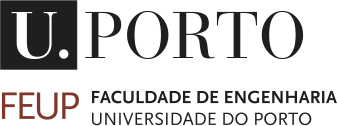
</Body>
<br>   
<br>   
<br>   

# **Mini projects on machine learning and control systems**

### 2025/2026      

<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt)

**José P. Carvalho** (jose.carvalho@fe.up.pt)

FEUP, Nov. 2025


---


# 1 - Machine Learning

*In this section we will focus on a typical (supervised) machine learning problem:* **Classification**.



## The k-nearest neighbors algorithm

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm


<Body>   
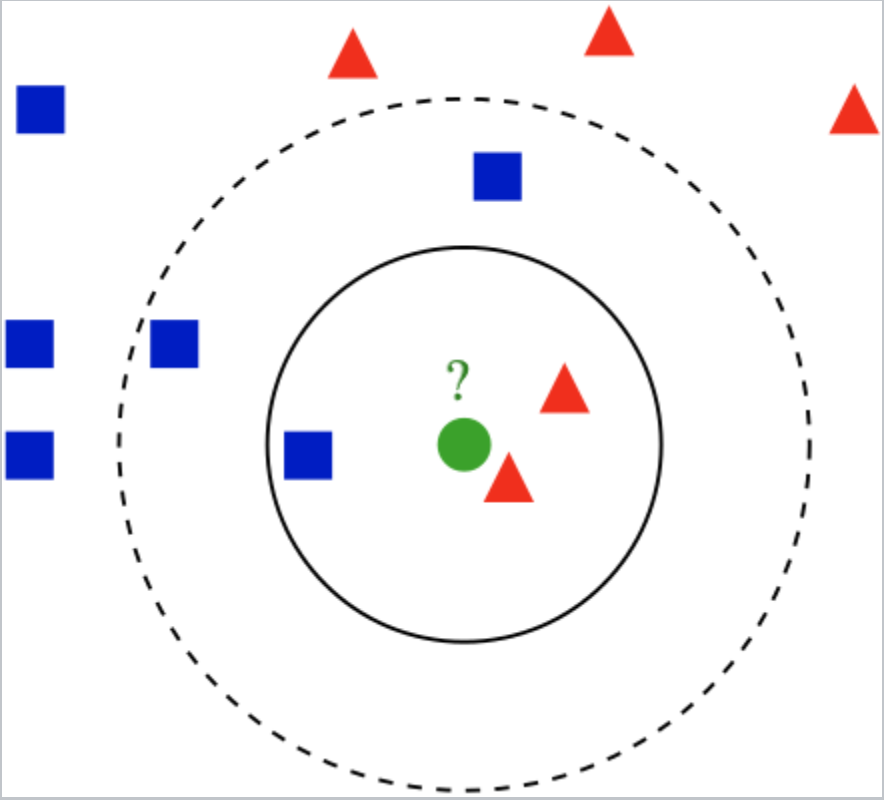

**Example of k-NN classification.** The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

In the following example we will implement the K-NN to two classes. The data that will be generated has two features (which is easy to visualize) and is composed by 500 samples of class **1** and 1000 samples of class **2**. Thus, the date set has a total of 1500 samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#Let's create some data for 2 classes

# to make sure we have always the same data
np.random.seed(10)

# Distribution for class 1
mu_1 = np.array([-5,-5])
sigma_1 = np.array([[1,-1],[-1,2]])

# Distribution for class 2
mu_2 = np.array([2,1])
sigma_2 = np.array([[1,0],[0,4]])

# Sample from class distributions
size_1 = 500
size_2 = 1000
X_1 =  np.random.multivariate_normal(mu_1, sigma_1, size=size_1)
X_2 =  np.random.multivariate_normal(mu_2, sigma_2, size=size_2)


X = np.vstack((X_1,X_2))
y = np.concatenate((np.ones(size_1),
                    2*np.ones(size_2)))


In [2]:
data = pd.DataFrame(X, y, columns=['feature_' + str(i) for i in range(1, 3)])
data


,feature_1,feature_2
1.0,-5.756671,-2.934820
1.0,-3.689812,-7.129785
1.0,-5.907111,-4.378774
1.0,-5.168790,-4.599285
1.0,-5.095443,-5.050824
...,...,...
2.0,1.148331,5.251404
2.0,1.439993,-1.420136
2.0,2.647184,-0.947570
2.0,2.183520,3.907392


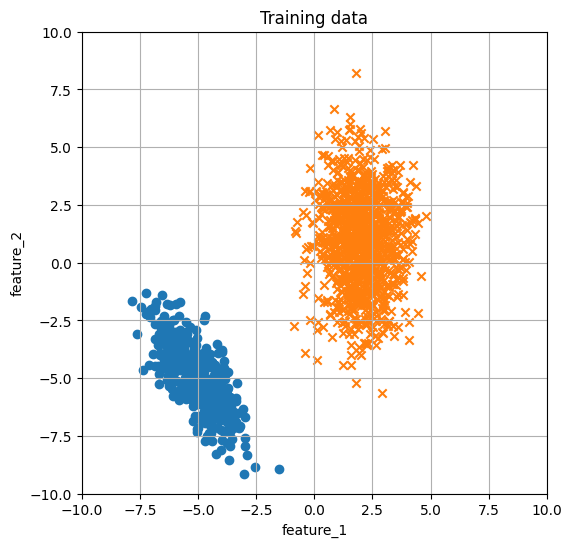

In [3]:
plt.figure(figsize=(6,6))

#plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', marker='.', alpha=0.4)

plt.scatter(X_1[:,0], X_1[:,1], marker='o')
plt.scatter(X_2[:,0], X_2[:,1], marker='x')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.title('Training data')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.grid()
#plt.tight_layout()

In [4]:
# np.random.seed(42)
# new_pt = np.random.uniform(0, 2, size=2)
new_pt = np.array([-2.5,0])

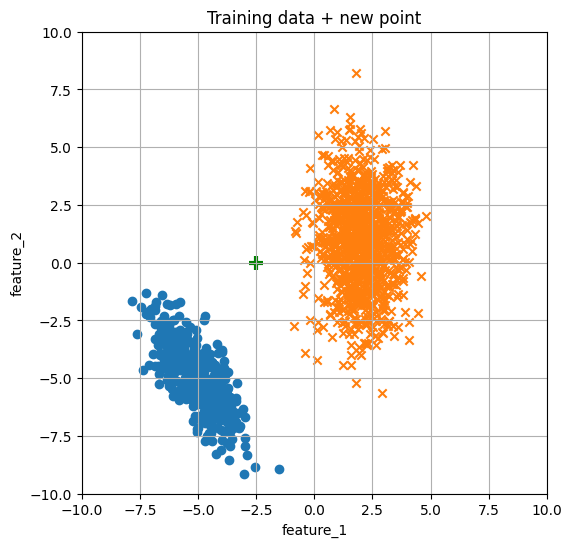

In [5]:
plt.figure(figsize=(6,6))

plt.scatter(X_1[:,0], X_1[:,1], marker='o')
plt.scatter(X_2[:,0], X_2[:,1], marker='x')
plt.scatter(new_pt[0], new_pt[1], marker='+', color='g', s=100, linewidth=3)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.title('Training data + new point')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.grid()



In [ ]:
K = 15  #n_neighbors
def distance(pts1, pts2):
    pts1 = np.atleast_2d(pts1)
    pts2 = np.atleast_2d(pts2)
    return np.sqrt( (pts1[:,0]-pts2[:,0])**2 + (pts1[:,1]-pts2[:,1])**2)

# compute the distance between all training data points and the new point
dists = distance(X, new_pt)

# get the classes (from the training data) of the K nearest points
nearest_classes = y[np.argsort(dists)[:K]]

print(nearest_classes)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


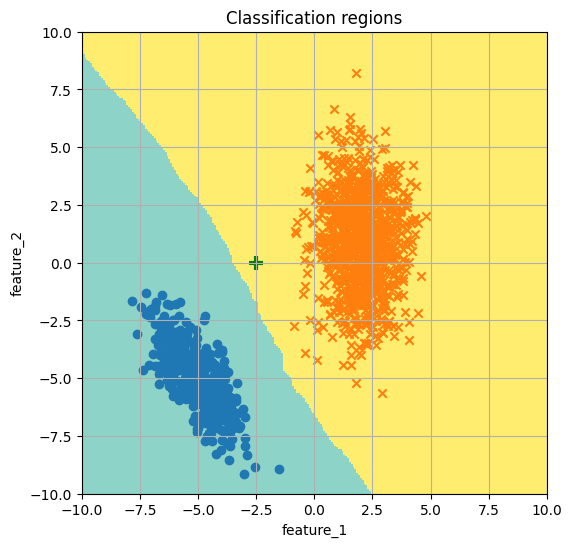

In [7]:
from sklearn.neighbors import KNeighborsClassifier
K = 16  #n_neighbors
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X, y)

clf.predict(new_pt.reshape(1, -1)) # input has to be 2D

grid_1d = np.linspace(-10, 10, 256)
grid_x1, grid_x2 = np.meshgrid(grid_1d, grid_1d)
grid = np.stack((grid_x1.ravel(), grid_x2.ravel()), axis=1)

y_grid = clf.predict(grid)

plt.figure(figsize=(6,6))

plt.pcolormesh(grid_x1, grid_x2, y_grid.reshape(grid_x1.shape),
               cmap='Set3', alpha=1.)

plt.scatter(X_1[:,0], X_1[:,1], marker='o')
plt.scatter(X_2[:,0], X_2[:,1], marker='x')
plt.scatter(new_pt[0], new_pt[1], marker='+', color='g', s=100, linewidth=3)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.title('Classification regions')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.grid()


### **Activity 1**

Implement the KNN example with the Titanic data.
Follow the blog: https://regenerativetoday.com/a-complete-beginners-guide-to-knn-classifier/


In [8]:
!wget -O titanic_data.csv.zip https://www.dropbox.com/s/5s3i9n80n8l7xaw/titanic_data.csv.zip?dl=0 --quiet
!unzip titanic_data.csv.zip -d.


Archive:  titanic_data.csv.zip
  inflating: ./titanic_data.csv      
  inflating: ./__MACOSX/._titanic_data.csv  


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay



In [10]:
titanic = pd.read_csv('titanic_data.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Select the important features

In [12]:
titanic1 = titanic[['Pclass', 'Sex', 'Fare', 'Survived']]

Pre-process the features

In [13]:
titanic1['Sex'] = titanic1.Sex.replace({'male':0, 'female':1})
X = titanic1[['Pclass', 'Sex', 'Fare']]
y = titanic1['Survived']

<ipython-input-13-3d4bffada22c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic1['Sex'] = titanic1.Sex.replace({'male':0, 'female':1})


Split the dataset into training and testing

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
#K =
#knn = KNeighborsClassifier(n_neighbors )


Implement the classifier!

You can use the functions: knn.fit(), knn.score(), knn.predict()

And confusion_matrix, ConfusionMatrixDisplay to visualize.


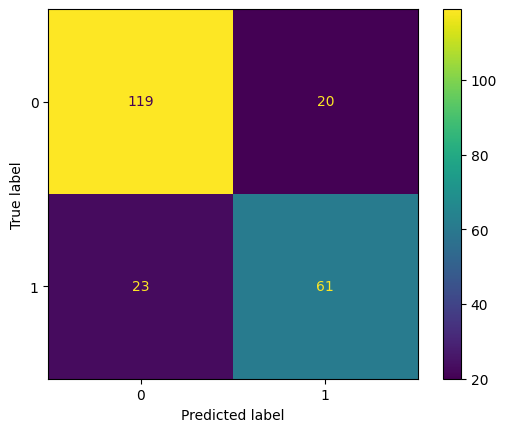

In [21]:
#cm = confusion_matrix(...,...)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot()
#plt.show()

### **Activity 2**

Repeat the first K-NN example, but for 3 features!

In [17]:
#Let's create some data for 2 classes

# to make sure we have always the same data
np.random.seed(10)

# Distribution for class 1
mu_1 =
sigma_1 =

# Distribution for class 2
mu_2 =
sigma_2 =

# Sample from class distributions
size_1 = 500
size_2 = 1000
X_1 =  np.random.multivariate_normal(mu_1, sigma_1, size=size_1)
X_2 =  np.random.multivariate_normal(mu_2, sigma_2, size=size_2)


X = np.vstack((X_1,X_2))
y = np.concatenate((np.ones(size_1),
                    2*np.ones(size_2)))


SyntaxError: ignored

In [ ]:
data = pd.DataFrame(X, y, columns=['feature_' + str(i) for i in range(1, 4)])
data


In [ ]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


ax.scatter3D(X_1[:,0], X_1[:,1], X_1[:,2], marker='o')
ax.scatter3D(X_2[:,0], X_2[:,1], X_2[:,2], marker='x')

ax.set_title('Data')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax.set_zlabel('feature_3')


In [ ]:
new_pt = np.array([-2.5,-2.5,1])

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


ax.scatter3D(X_1[:,0], X_1[:,1], X_1[:,2], marker='o')
ax.scatter3D(X_2[:,0], X_2[:,1], X_2[:,2], marker='x')
ax.scatter3D(new_pt[0], new_pt[1], new_pt[2], marker='+', color='g', s=100, linewidth=3)

ax.set_title('Data')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax.set_zlabel('feature_3')


In [ ]:

def distance3d(pts1, pts2):


# compute the distance between all training data points and the new point
dists = distance3d(X, new_pt)

# get the classes (from the training data) of the K nearest points
nearest_classes = y[np.argsort(dists)[:K]]

print(nearest_classes)